In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("/content/diabetes.csv")

In [ ]:
df.shape

(768, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
334,1,95,60,18,58,23.9,0.260,22,0
545,8,186,90,35,225,34.5,0.423,37,1
330,8,118,72,19,0,23.1,1.476,46,0
428,0,135,94,46,145,40.6,0.284,26,0
110,3,171,72,33,135,33.3,0.199,24,1
416,1,97,68,21,0,27.2,1.095,22,0
422,0,102,64,46,78,40.6,0.496,21,0
404,5,168,64,0,0,32.9,0.135,41,1
715,7,187,50,33,392,33.9,0.826,34,1
108,3,83,58,31,18,34.3,0.336,25,0


In [ ]:
col_names = list(df.columns)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

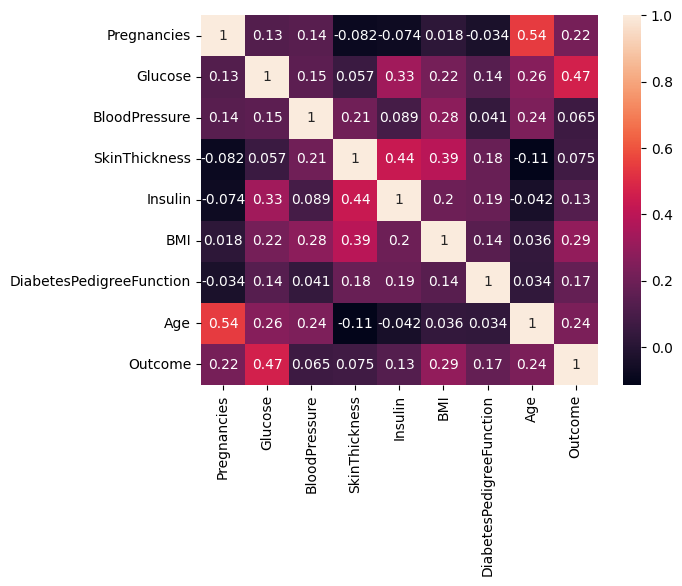

In [ ]:
sns.heatmap(data = df.corr() , annot = True)

# Preprocessing

### Imputation

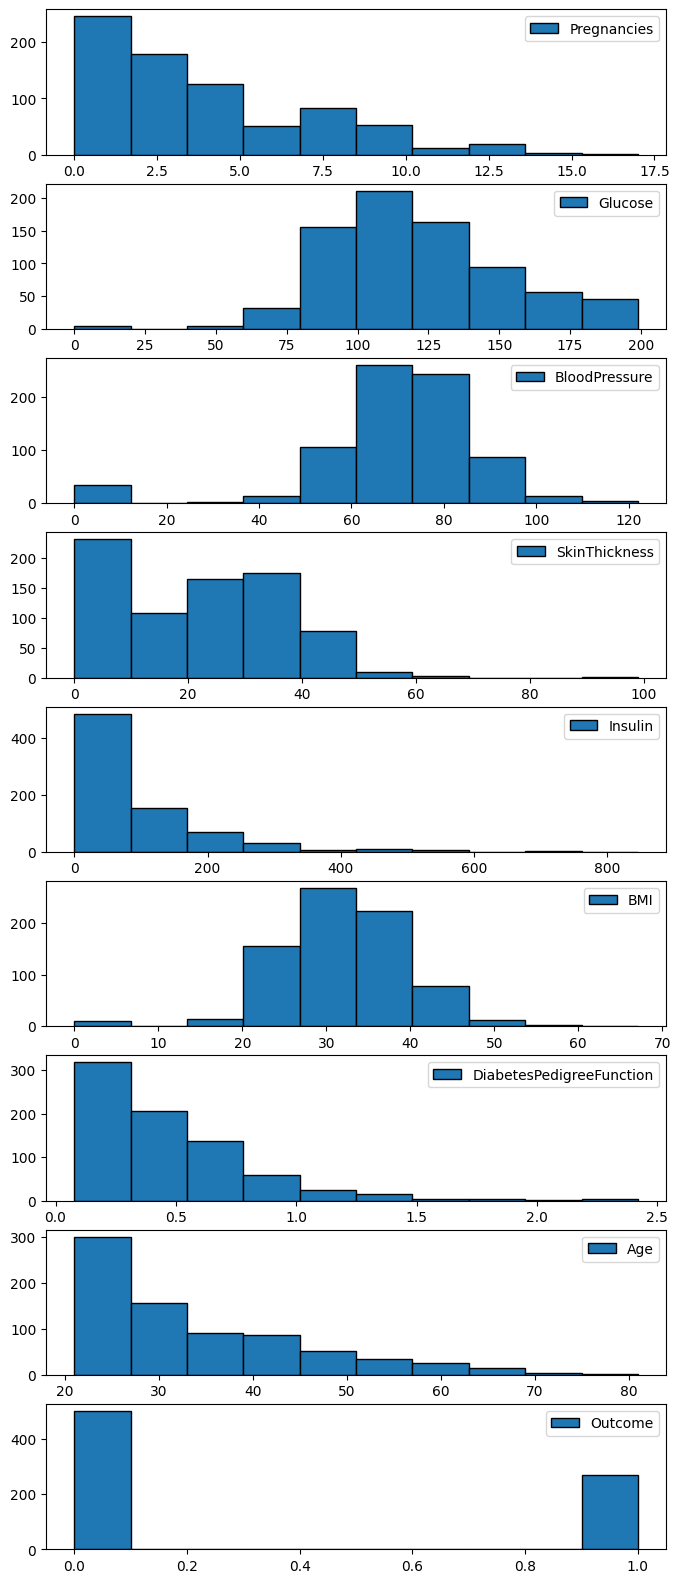

In [ ]:
fig, axs = plt.subplots(df.shape[1] , 1, figsize=(8, 20))
for i , col in enumerate(df.columns) :
  axs[i].hist(df[col] , edgecolor = "black" , label = col)
  axs[i].legend()

In [ ]:
# glucose bp bmi number of missing values
zerocol = ['Glucose' ,'BMI','BloodPressure' ,'Insulin','SkinThickness']
a ={}
for i in zerocol:
  a[i] = ((df[i] == 0).sum())

In [ ]:
a

{'Glucose': 5,
 'BMI': 11,
 'BloodPressure': 35,
 'Insulin': 374,
 'SkinThickness': 227}

In [ ]:
df1 = df.copy( deep = True)

## train test split

In [ ]:
x = df1.drop(columns = ['Outcome'])
y = df1['Outcome']

In [ ]:
# making the zeroes nan
from math import nan
x[zerocol] = x[zerocol].replace(to_replace = 0 , value = nan)

In [ ]:
x.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0


In [ ]:
x.var()

,0
Pregnancies,11.354056
Glucose,932.425376
BloodPressure,153.317842
SkinThickness,109.767160
Insulin,14107.703775
BMI,47.955463
DiabetesPedigreeFunction,0.109779
Age,138.303046


In [ ]:
x.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
507,1,130.0,60.0,23.0,170.0,28.6,0.692,21
316,3,99.0,80.0,11.0,64.0,19.3,0.284,30
590,11,111.0,84.0,40.0,NaN,46.8,0.925,45
747,1,81.0,74.0,41.0,57.0,46.3,1.096,32
174,2,75.0,64.0,24.0,55.0,29.7,0.370,33


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=69)

In [ ]:
a1 ={}
a2 ={}
for i in zerocol:
  a1[i] = (X_train[i].isnull().sum())
  a2[i] = (X_test[i].isnull().sum())

In [ ]:
print(a1)
print( a2 )

{'Glucose': 4, 'BMI': 10, 'BloodPressure': 29, 'Insulin': 307, 'SkinThickness': 184}
{'Glucose': 1, 'BMI': 1, 'BloodPressure': 6, 'Insulin': 67, 'SkinThickness': 43}


### Imputation of Glucose , BMI , BP

In [ ]:
# Imputation for zeroes in BloodPressure, Glucose, and BMI with there means because there distribution is nearly symmetric about mean
#  there is not much difference in mean and median value
zerocol1 = ['Glucose' ,'BMI','BloodPressure']
for i in zerocol1:
  mean = np.mean(X_train[i])
  print(mean)
  X_train[i] = X_train[i].fillna(value = mean)
  X_test[i] = X_test[i].fillna(value = mean)
  print(mean)

121.11311475409836
121.11311475409836
32.41076158940397
32.41076158940397
72.40683760683761
72.40683760683761


*  Glucose with mean 121.13
*  BMI 32.41
*  BP  72.40

In [ ]:
a1 ={}
a2 = {}
for i in zerocol1:
  a1[i] = (X_train[i].isnull().sum())
  a2[i] = (X_test[i].isnull().sum())


In [ ]:
print(a1)
print(a2)

{'Glucose': 0, 'BMI': 0, 'BloodPressure': 0}
{'Glucose': 0, 'BMI': 0, 'BloodPressure': 0}


Text(0.5, 1.0, 'After imputation')

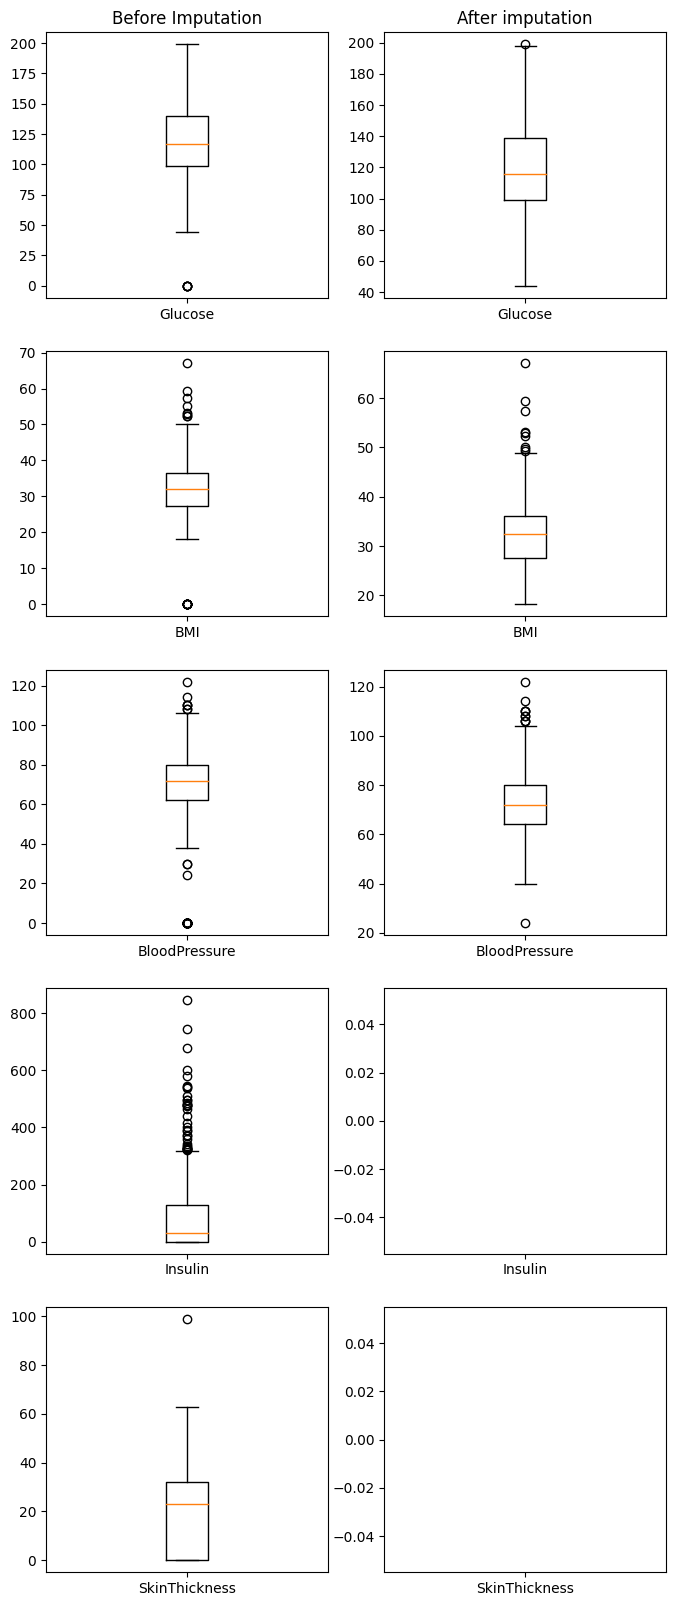

In [ ]:
# comparison of the data before and after imputation

fig, axs = plt.subplots(len(zerocol) , 2, figsize=(8, 20))
for i , col in enumerate(zerocol) :
  axs[i][0].boxplot(df[col] , labels= [col])
axs[0][0].set_title('Before Imputation')

for i , col in enumerate(zerocol) :
  axs[i][1].boxplot(X_train[col] , labels= [col])
axs[0][1].set_title('After imputation')

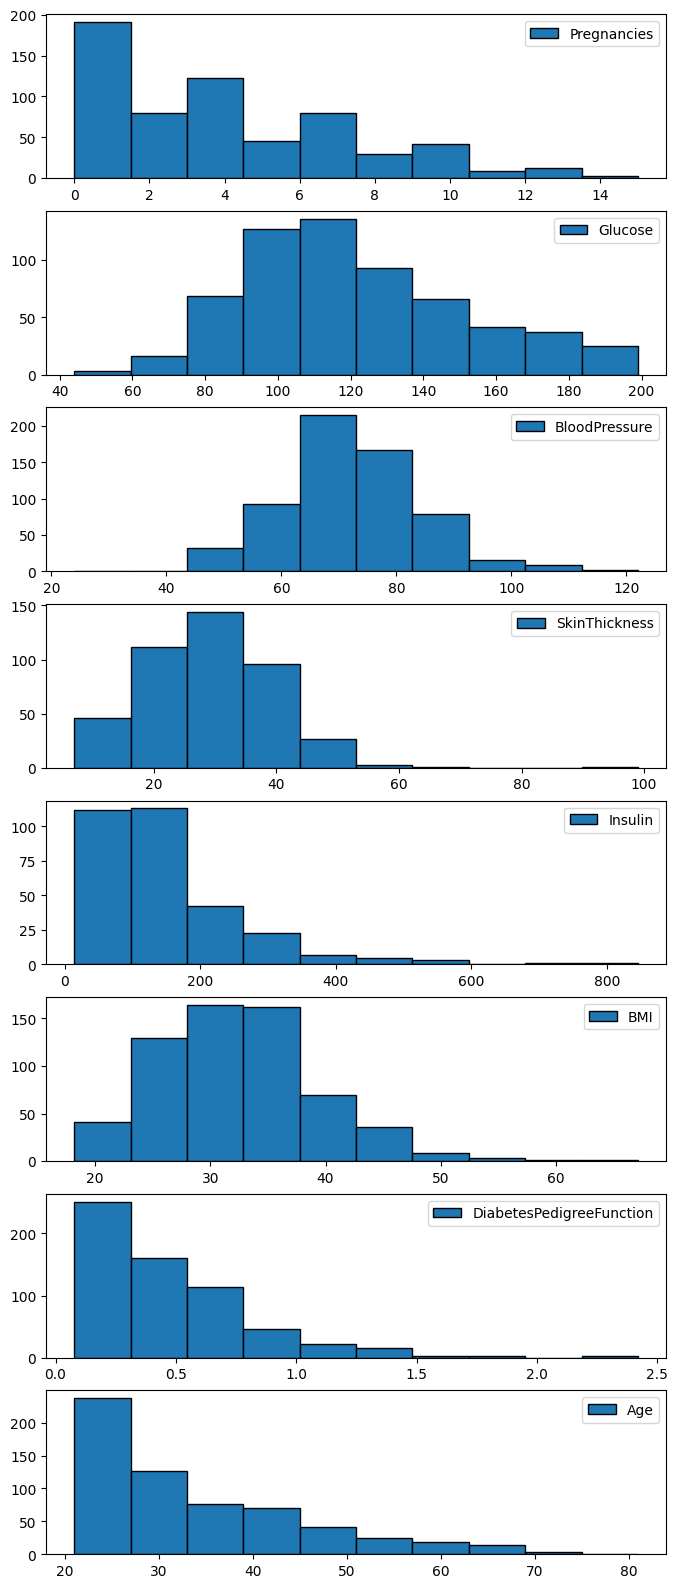

In [ ]:
fig, axs = plt.subplots(X_train.shape[1] , 1, figsize=(8, 20))
for i , col in enumerate(X_train.columns) :
  axs[i].hist(X_train[col] , edgecolor = "black" , label = col)
  axs[i].legend()

In [ ]:
X_train.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
103,1,81.0,72.0,18.0,40.0,26.6,0.283,24
455,14,175.0,62.0,30.0,NaN,33.6,0.212,38
686,3,130.0,64.0,NaN,NaN,23.1,0.314,22
150,1,136.0,74.0,50.0,204.0,37.4,0.399,24
335,0,165.0,76.0,43.0,255.0,47.9,0.259,26
259,11,155.0,76.0,28.0,150.0,33.3,1.353,51
754,8,154.0,78.0,32.0,NaN,32.4,0.443,45
77,5,95.0,72.0,33.0,NaN,37.7,0.370,27
189,5,139.0,80.0,35.0,160.0,31.6,0.361,25
592,3,132.0,80.0,NaN,NaN,34.4,0.402,44


In [ ]:
for i in col_names :
  df1[i] = df1[i].astype(np.float64)

In [ ]:
# Calculate the variance of each column in the DataFrame.

print("Variance:\n", X_train[zerocol1].var())
print("Variance:\n", x[zerocol1].var())
print("Mean:\n", X_train[zerocol1].mean())
print("Mean:\n", x[zerocol1].mean())

Variance:
 Glucose          928.292325
BMI               46.644144
BloodPressure    146.370592
dtype: float64
Variance:
 Glucose          932.425376
BMI               47.955463
BloodPressure    153.317842
dtype: float64
Mean:
 Glucose          121.113115
BMI               32.410762
BloodPressure     72.406838
dtype: float64
Mean:
 Glucose          121.686763
BMI               32.457464
BloodPressure     72.405184
dtype: float64


There is not much change is observed in variannce in Glucose BP BMI column

### Imputation for Insulin and Skin thickness
Using (Multivariate Imputation by Chained Equations (MICE))

In [ ]:
zerocol2 = ['Insulin','SkinThickness']
a1 ={}
a2 = {}
for i in zerocol2:
  a1[i] = (X_train[i].isnull().sum())
  a2[i] = (X_test[i].isnull().sum())

print(a1)
print(a2)

{'Insulin': 307, 'SkinThickness': 184}
{'Insulin': 67, 'SkinThickness': 43}


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [ ]:
# Assuming 'INSULIN' and 'SKINTHICKNESS' are the columns with missing values
columns_with_missing = ['Insulin', 'SkinThickness']

# Initialize the IterativeImputer with appropriate parameters
mice_imputer = IterativeImputer(max_iter=100, random_state=0)
mice_imputer.fit(X_train)

# Perform MICE imputation
X_train_trans = mice_imputer.transform(X_train)
X_test_trans = mice_imputer.transform(X_test)

X_train_trans = pd.DataFrame(X_train_trans , columns=x.columns)
X_test_trans = pd.DataFrame(X_test_trans, columns=x.columns)
# Display the imputed DataFrame



In [ ]:
X_train_trans.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
23,4.0,173.0,70.0,14.000000,168.000000,29.7,0.361,33.0
158,0.0,138.0,60.0,35.000000,167.000000,34.6,0.534,21.0
208,7.0,196.0,90.0,37.101087,311.387406,39.8,0.451,41.0
143,0.0,139.0,62.0,17.000000,210.000000,22.1,0.207,21.0
570,0.0,125.0,68.0,20.351471,147.238945,24.7,0.206,21.0
177,3.0,99.0,54.0,19.000000,86.000000,25.6,0.154,24.0
168,4.0,99.0,68.0,38.000000,107.103485,32.8,0.145,33.0
356,3.0,78.0,50.0,32.000000,88.000000,31.0,0.248,26.0
50,2.0,101.0,58.0,17.000000,265.000000,24.2,0.614,23.0
493,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0


In [ ]:
print("Variance after:\n", X_train_trans[zerocol2].var())
print("Variance before:\n", x[zerocol2].var())
print("Mean after:\n", X_train[zerocol2].mean())
print("Mean before:\n", x[zerocol2].mean())

Variance after:
 Insulin          8662.179322
SkinThickness      91.577765
dtype: float64
Variance before:
 Insulin          14107.703775
SkinThickness      109.767160
dtype: float64
Mean after:
 Insulin          151.214984
SkinThickness     29.169767
dtype: float64
Mean before:
 Insulin          155.548223
SkinThickness     29.153420
dtype: float64


In [ ]:
zerocol2 = ['Insulin','SkinThickness']
a1 ={}
a2 = {}
for i in zerocol2:
  a1[i] = (X_train_trans[i].isnull().sum())
  a2[i] = (X_test_trans[i].isnull().sum())

print(a1)
print(a2)

{'Insulin': 0, 'SkinThickness': 0}
{'Insulin': 0, 'SkinThickness': 0}


## Outlier Treatment

#### Pregnancies

In [ ]:
# frequency table for pregnancies
freq = X_train_trans['Pregnancies'].value_counts().sort_index()
freq = freq.reset_index()
freq.columns = ['Pregnancies','Frequency']
print(freq)
pregnancy = pd.DataFrame(freq )

    Pregnancies  Frequency
0           0.0         90
1           1.0        101
2           2.0         80
3           3.0         64
4           4.0         58
5           5.0         45
6           6.0         42
7           7.0         38
8           8.0         30
9           9.0         22
10         10.0         20
11         11.0          9
12         12.0          7
13         13.0          5
14         14.0          2
15         15.0          1


<BarContainer object of 16 artists>

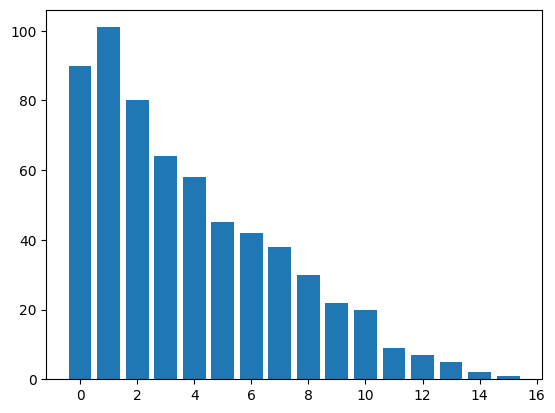

In [ ]:
plt.bar(pregnancy['Pregnancies'] , pregnancy['Frequency'])

In [ ]:
X_train_trans['Pregnancies'].quantile([0.2,0.4,0.6,0.8])
X_train_trans['Pregnancies'].value_counts(normalize = True)

,proportion
Pregnancies,
1.0,0.164495
0.0,0.146580
2.0,0.130293
3.0,0.104235
4.0,0.094463
5.0,0.073290
6.0,0.068404
7.0,0.061889
8.0,0.048860


* 0-2  classify A (44.11%)
* 3-6 classify B (34.02%)
* 7+ Classify C (25.87%)

In [ ]:
# Label encoding for the Pregnancies column
def preg(x):
  if (x>= 0 and x<=2):
    return 0
  if (x>= 3 and x<=6):
    return 1
  if(x>= 7):
    return 2

In [ ]:
X_train_trans['Pregnancies'] = X_train_trans['Pregnancies'].map(preg)
X_test_trans['Pregnancies'] = X_test_trans['Pregnancies'].map(preg)

In [ ]:
X_test_trans

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,88.000000,58.0,26.000000,16.000000,28.4,0.766,22.0
1,2,152.000000,90.0,33.000000,29.000000,26.8,0.731,43.0
2,1,98.000000,58.0,33.000000,190.000000,34.0,0.430,43.0
3,1,126.000000,88.0,41.000000,235.000000,39.3,0.704,27.0
4,2,91.000000,68.0,23.285822,91.528303,24.2,0.200,58.0
...,...,...,...,...,...,...,...,...
149,0,93.000000,70.0,31.000000,85.995568,30.4,0.315,23.0
150,0,121.113115,68.0,35.000000,148.014684,32.0,0.389,22.0
151,0,121.000000,66.0,30.000000,165.000000,34.3,0.203,33.0
152,1,191.000000,68.0,15.000000,130.000000,30.9,0.299,34.0


# Fitting the Model

In [ ]:
X_train_trans.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
131,0,120.0,80.0,48.000000,200.000000,38.9,1.162,41.0
299,1,78.0,48.0,29.530921,68.071779,33.7,0.654,25.0
337,0,179.0,90.0,27.000000,271.009209,44.1,0.686,23.0
587,0,97.0,70.0,40.000000,106.465130,38.1,0.218,30.0
476,1,80.0,82.0,31.000000,70.000000,34.2,1.292,27.0
404,0,93.0,60.0,25.000000,92.000000,28.7,0.532,22.0
190,0,113.0,64.0,35.000000,133.847536,33.6,0.543,21.0
185,0,107.0,76.0,39.836368,128.749534,45.3,0.686,24.0
542,0,107.0,62.0,30.000000,74.000000,36.6,0.757,25.0
346,2,184.0,85.0,15.000000,279.973133,30.0,1.213,49.0


In [ ]:
X_test_trans

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,88.000000,58.0,26.000000,16.000000,28.4,0.766,22.0
1,2,152.000000,90.0,33.000000,29.000000,26.8,0.731,43.0
2,1,98.000000,58.0,33.000000,190.000000,34.0,0.430,43.0
3,1,126.000000,88.0,41.000000,235.000000,39.3,0.704,27.0
4,2,91.000000,68.0,23.285822,91.528303,24.2,0.200,58.0
...,...,...,...,...,...,...,...,...
149,0,93.000000,70.0,31.000000,85.995568,30.4,0.315,23.0
150,0,121.113115,68.0,35.000000,148.014684,32.0,0.389,22.0
151,0,121.000000,66.0,30.000000,165.000000,34.3,0.203,33.0
152,1,191.000000,68.0,15.000000,130.000000,30.9,0.299,34.0


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, confusion_matrix , f1_score

In [ ]:
# prompt: robust scalar

import pandas as pd
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_trans.drop(columns = 'Pregnancies'))
X_train_scaled = scaler.transform(X_train_trans.drop(columns = 'Pregnancies'))
X_test_scaled = scaler.transform(X_test_trans.drop(columns = 'Pregnancies'))

X_train_scaled = pd.DataFrame(X_train_scaled , columns=X_train_trans.drop(columns = 'Pregnancies').columns)
X_test_scaled = pd.DataFrame(X_test_scaled , columns=X_train_trans.drop(columns = 'Pregnancies').columns)


In [ ]:
X_train_scaled.insert(0, 'Pregnancies',X_train_trans['Pregnancies'])
X_test_scaled.insert(0, 'Pregnancies',X_test_trans['Pregnancies'])

In [ ]:
X_test_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,2.890642,4.797942,2.719144,0.172052,4.161728,2.280353,1.882528
1,2,4.992926,7.445083,3.451222,0.311845,3.927265,2.176159,3.679487
2,1,3.219124,4.797942,3.451222,2.043120,4.982351,1.280094,3.679487
3,1,4.138873,7.279637,4.287882,2.527017,5.759011,2.095781,2.310375
4,2,2.989186,5.625174,2.435289,0.984228,3.546261,0.595392,4.963029
...,...,...,...,...,...,...,...,...
149,0,3.054883,5.790620,3.242057,0.924733,4.454808,0.937743,1.968098
150,0,3.978348,5.625174,3.660387,1.591641,4.689271,1.158038,1.882528
151,0,3.974632,5.459728,3.137474,1.774289,5.026313,0.604323,2.823792
152,1,6.274006,5.625174,1.568737,1.397924,4.528078,0.890112,2.909362


In [ ]:
# Standardizing
#scaler = RobustScaler()

# Fit the scaler to the training data
#scaler.fit(X_train_trans)

# Transform both the training and test data
#X_train_scaled = scaler.transform(X_train_trans)
#X_test_scaled = scaler.transform(X_test_trans)

In [ ]:
#X_train_scaled = pd.DataFrame(X_train_scaled , columns = X_test_trans.columns)
#X_test_scaled = pd.DataFrame(X_test_scaled , columns = X_test_trans.columns)

In [ ]:
#X_test_scaled

## Logistic Regression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train_scaled , y_train)
y_pred = lr.predict(X_test_scaled)
y_pred_proba = lr.predict_proba(X_test_scaled)[:,1]


In [ ]:
accuracy_score(y_test , y_pred)

0.7987012987012987

* About 77.92% labels are predicted correctly

In [ ]:
cm = confusion_matrix(y_test , y_pred)

In [ ]:
import seaborn as sns

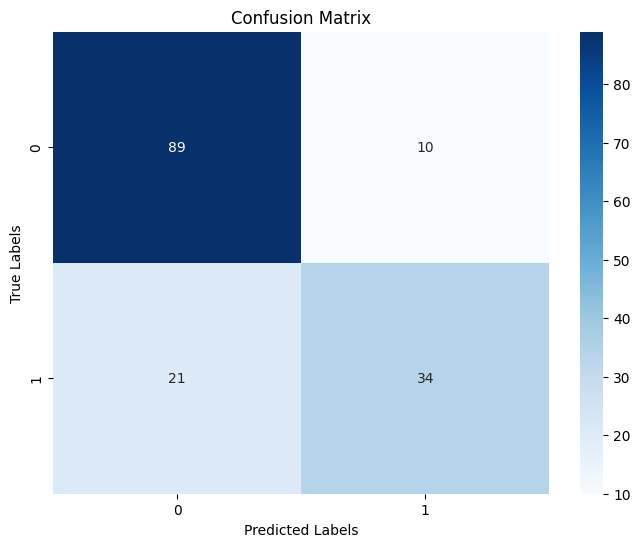

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
precision = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)
f1score = f1_score(y_test , y_pred)

In [ ]:
print("Precision score : " , precision)
print("Recall score : " , recall)
print("F1 score : " , f1score)

Precision score :  0.7727272727272727
Recall score :  0.6181818181818182
F1 score :  0.6868686868686869



* Out of total diabetic cases 60% were predicted correctly which is very low
so  we will use decision tree.





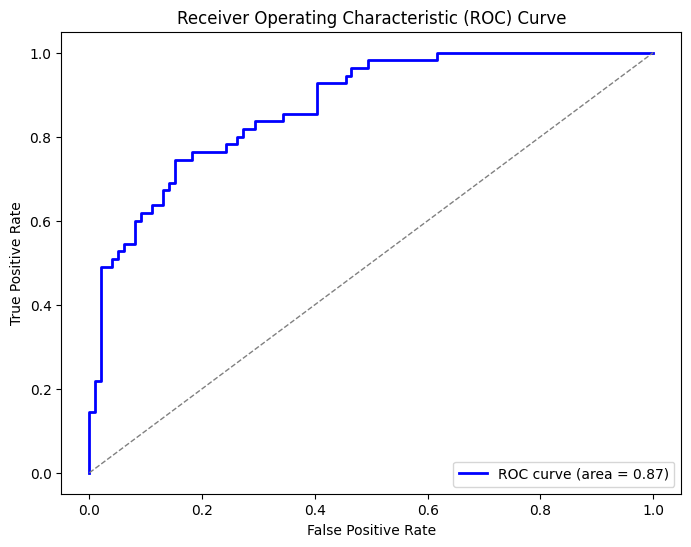

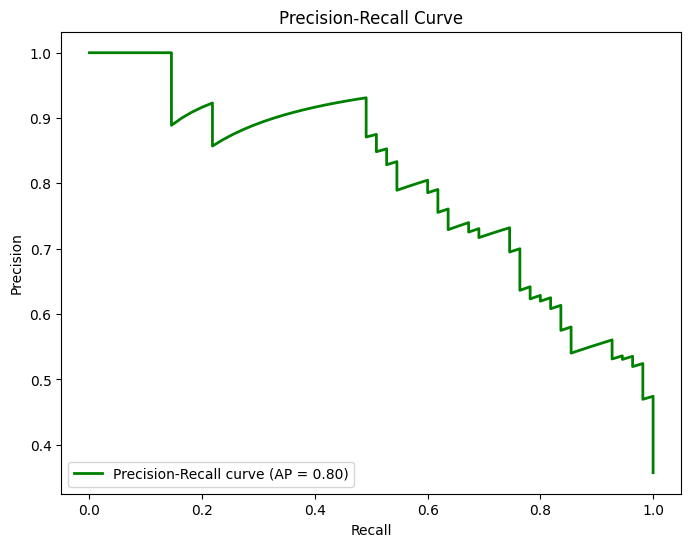

ROC AUC: 0.8719926538108356
Average Precision: 0.8036208005377075


In [ ]:
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Calculate average precision
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

# Print ROC AUC and average precision
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)

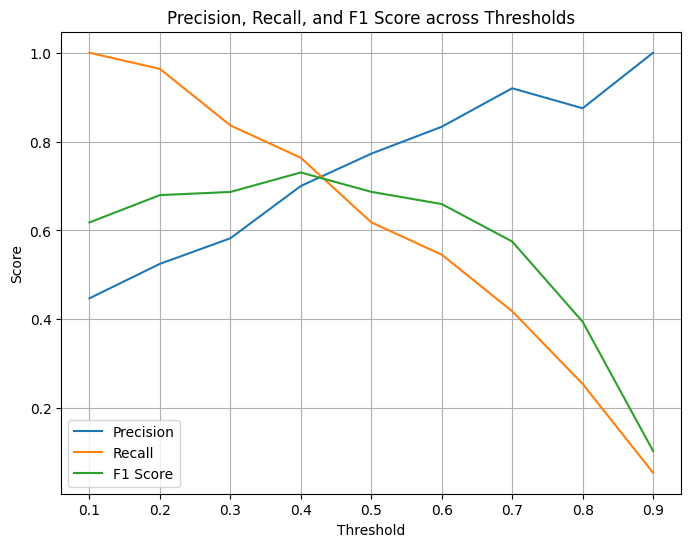

In [ ]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = []
recalls = []
f1_scores = []

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score across Thresholds')
plt.legend()
plt.grid(True)
plt.show()


We can see at nearly 0.40 threshold F1 score is highest

### After change in threshold

In [ ]:
y_pred_mod = (y_pred_proba >= 0.4).astype(int)

In [ ]:
cm1 = confusion_matrix(y_test , y_pred_mod)

In [ ]:
precision = precision_score(y_test , y_pred_mod)
recall = recall_score(y_test , y_pred_mod)
f1score = f1_score(y_test , y_pred_mod)

In [ ]:
print("Accuracy score : " , accuracy_score(y_test , y_pred_mod))
print("Precision score : " , precision)
print("Recall score : " , recall)
print("F1 score : " , f1score)

Accuracy score :  0.7987012987012987
Precision score :  0.7
Recall score :  0.7636363636363637
F1 score :  0.7304347826086957


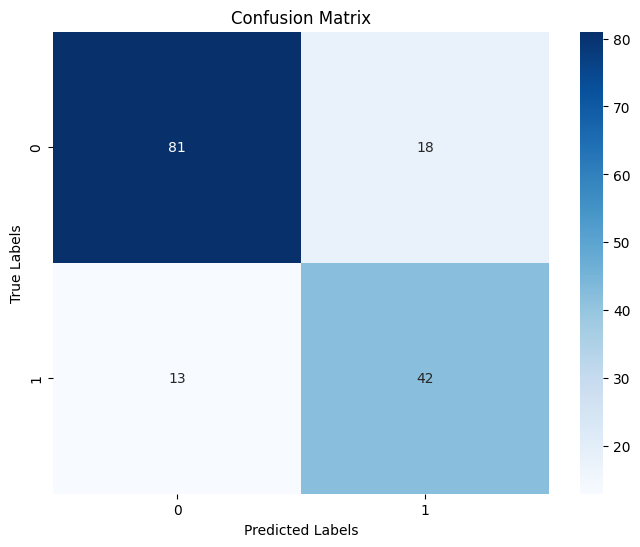

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Decision tree

### Decision tree 1

Accuracy: 0.7337662337662337
Confusion matrix:
 [[76 23]
 [18 37]]
Precision: 0.6166666666666667
Recall: 0.6727272727272727
F1 score: 0.6434782608695652


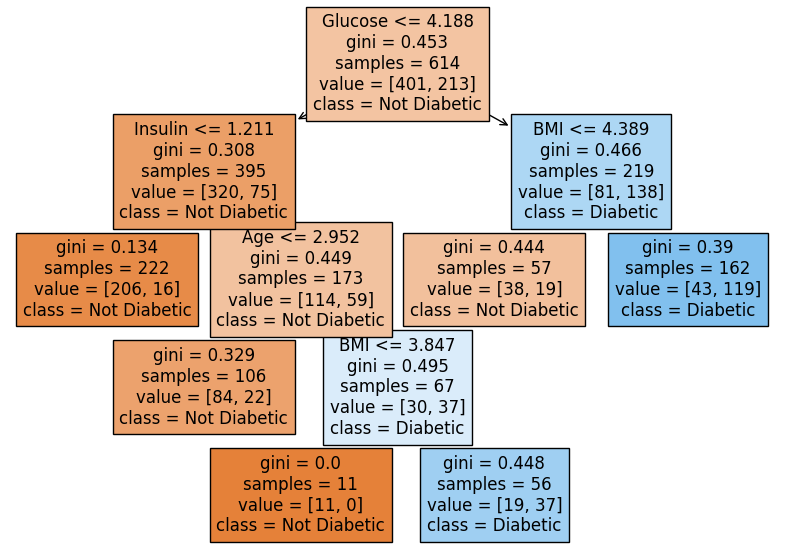

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dt_clf = DecisionTreeClassifier(min_impurity_decrease = 0.01)

# Fit the classifier to the training data
dt_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_dt = dt_clf.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy:", accuracy_dt)

# Create a confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion matrix:\n", cm_dt)

# Calculate the precision, recall, and F1 score
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_score_dt = f1_score(y_test, y_pred_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("F1 score:", f1_score_dt)

# Plot the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt_clf, feature_names=X_test_trans.columns, class_names=["Not Diabetic", "Diabetic"], filled=True)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

# Define scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}
# Grid search cv
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [5, 15, 25, 35],
    'min_impurity_decrease' : [0.001, 0.005 , 0.01 , 0.02 , 0.04, 0.05]
}
classifier = GridSearchCV( dt_clf , param_grid=param_grid, cv=5, scoring= 'f1',n_jobs = 1)

In [ ]:
classifier.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(min_impurity_decrease=0.01),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_impurity_decrease': [0.001, 0.005, 0.01, 0.02,
                                                   0.04, 0.05],
                         'min_samples_leaf': [5, 15, 25, 35],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
# Print the best hyperparameters
print("Best hyperparameters:", classifier.best_params_)

# Print the best scores for each metric
print("Best f1 score:", classifier.best_score_)


Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_impurity_decrease': 0.02, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best f1 score: 0.6844607108210601


Best parameters are
* 'criterion': 'entropy',
* 'max_depth': None,
* 'min_impurity_decrease': 0.02,
* 'min_samples_leaf': 5,
* 'min_samples_split': 2

In [ ]:
pd.DataFrame(classifier.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_impurity_decrease,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006910,0.001058,0.005380,0.000586,gini,None,0.001,5,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.494118,0.461538,0.560976,0.617284,0.574713,0.541726,0.056328,718
1,0.006043,0.000662,0.004748,0.000719,gini,None,0.001,5,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.505747,0.467532,0.554217,0.635294,0.574713,0.547501,0.057674,654
2,0.006365,0.001408,0.004566,0.000626,gini,None,0.001,5,10,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.505747,0.461538,0.560976,0.619048,0.574713,0.544404,0.055002,656
3,0.004306,0.000197,0.003855,0.000154,gini,None,0.001,15,2,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.486486,0.595238,0.739130,0.700000,0.696629,0.643497,0.091807,117
4,0.004723,0.001194,0.004686,0.001084,gini,None,0.001,15,5,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.450704,0.595238,0.739130,0.700000,0.696629,0.636340,0.104310,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.003515,0.000289,0.003802,0.000712,entropy,20,0.05,25,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.585366,0.476190,0.584615,0.523077,0.589474,0.551744,0.045088,590
716,0.004254,0.001516,0.004055,0.000971,entropy,20,0.05,25,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.585366,0.476190,0.584615,0.523077,0.589474,0.551744,0.045088,590
717,0.003543,0.000174,0.004113,0.000644,entropy,20,0.05,35,2,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.585366,0.476190,0.584615,0.523077,0.589474,0.551744,0.045088,590
718,0.003667,0.000226,0.003641,0.000122,entropy,20,0.05,35,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.585366,0.476190,0.584615,0.523077,0.589474,0.551744,0.045088,590


### Decision tree 2

In [ ]:
dt_clf2 = DecisionTreeClassifier(criterion  = 'entropy', min_impurity_decrease = 0.02 ,  min_samples_leaf = 5 , min_samples_split = 2)

Accuracy: 0.7337662337662337
Confusion matrix:
 [[76 23]
 [18 37]]
Precision: 0.6166666666666667
Recall: 0.6727272727272727
F1 score: 0.6434782608695652


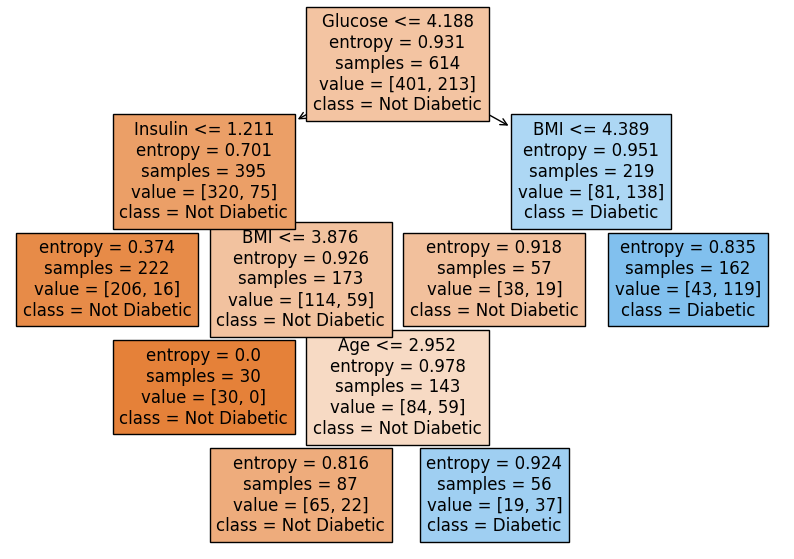

In [ ]:
# Fit the classifier to the training data
dt_clf2.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_dt2 = dt_clf2.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy_dt2 = accuracy_score(y_test, y_pred_dt2)
print("Accuracy:", accuracy_dt2)

# Create a confusion matrix
cm_dt2 = confusion_matrix(y_test, y_pred_dt2)
print("Confusion matrix:\n", cm_dt2)

# Calculate the precision, recall, and F1 score
precision_dt2 = precision_score(y_test, y_pred_dt2)
recall_dt2 = recall_score(y_test, y_pred_dt2)
f1_score_dt2 = f1_score(y_test, y_pred_dt2)
print("Precision:", precision_dt2)
print("Recall:", recall_dt2)
print("F1 score:", f1_score_dt2)

# Plot the decision tree

plt.figure(figsize=(10, 7))
plot_tree(dt_clf2, feature_names=X_test_trans.columns, class_names=["Not Diabetic", "Diabetic"], filled=True)
plt.show()

* accuracy = 73.37 %
* Precision: 61.66
* Recall: 67.27
* F1 score: 64.35

Not better than Logistic regression

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf_clf = RandomForestClassifier(n_estimators=100 , min_impurity_decrease = 0.005 ,max_samples = 0.75, criterion = 'entropy' )

# Fit the classifier to the training data
rf_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test_scaled)

# Calculate the accuracy of the predictions
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy_rf)

# Create a confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion matrix:\n", cm_rf)

# Calculate the precision, recall, and F1 score
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 score:", f1_score_rf)


Accuracy: 0.7337662337662337
Confusion matrix:
 [[77 22]
 [19 36]]
Precision: 0.6206896551724138
Recall: 0.6545454545454545
F1 score: 0.6371681415929203


In [ ]:
# Grid search cv to find best parameters

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_leaf': [5, 15],
    'min_impurity_decrease' : [0.005 , 0.01],
    'max_samples' : [0.25, 0.75]
}
classifier2 = GridSearchCV( rf_clf , param_grid=param_grid, cv=5, scoring= 'f1',n_jobs = 1)

In [ ]:
classifier2.fit(X_train_scaled, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", classifier2.best_params_)

# Print the best scores for each metric
print("Best f1 score:", classifier2.best_score_)

Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_samples': 0.75, 'min_impurity_decrease': 0.01, 'min_samples_leaf': 5}
Best f1 score: 0.631625579475213


**Random forest producing**
* Accuracy: 77.92
* Precision: 69.81
* Recall: 67.27
* F1 score: 68.52






# XGBoost

In [ ]:
import xgboost as xgb

# Create XGBoost classifier
xgb_clf = xgb.XGBClassifier(n_estimators = 100, learning_rate = 0.1)

# Train the model
xgb_clf.fit(X_train_scaled, y_train)

# Make predictions on the testing data
y_pred_xgb = xgb_clf.predict(X_test_scaled)

# Evaluate model performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy:", accuracy_xgb)

# Create a confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion matrix:\n", cm_xgb)

# Calculate the precision, recall, and F1 score
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_score_xgb = f1_score(y_test, y_pred_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1 score:", f1_score_xgb)


Accuracy: 0.7402597402597403
Confusion matrix:
 [[79 20]
 [20 35]]
Precision: 0.6363636363636364
Recall: 0.6363636363636364
F1 score: 0.6363636363636364
